In [30]:
import tensorflow as tf

In [31]:
mnist = tf.keras.datasets.mnist

In [32]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [33]:
import matplotlib.pyplot as plt

plt.imshow(x_train[5],cmap=plt.cm.binary)
print(x_train[0])

In [34]:
model = tf.keras.models.Sequential()

In [35]:
model.add(tf.keras.layers.Flatten())

In [37]:
#relu converts negative values to zero,keeps only positive value
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
#softmax converts values to 0-1 
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))

In [38]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2489 - accuracy: 0.9249
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1062 - accuracy: 0.9676
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0779 - accuracy: 0.9754


In [39]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0992 - accuracy: 0.9721
0.09919991344213486 0.972100019454956


In [40]:
model.save('sample.model')

INFO:tensorflow:Assets written to: sample.model/assets


In [41]:
new_model = tf.keras.models.load_model('sample.model')

In [43]:
prediction = new_model.predict(x_test)

In [44]:
print(prediction[0])

[9.4263254e-07 8.7287827e-07 4.5936235e-06 7.8509465e-06 1.0800551e-05
 1.2523800e-06 9.6612496e-10 9.9981183e-01 1.3586964e-06 1.6044511e-04]


In [45]:
import numpy as np

In [46]:
print(np.argmax(prediction[0]))

7


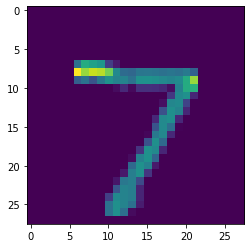

In [47]:
plt.imshow(x_test[0])